Task 1 Introduction

In this project, I've been approached by the Category Manager for Chips, who wants a better understanding the types of customers who purchase Chips and their purchasing behavior within the region.

The goal of this analysis is to answer key questions such as:

- Examine transaction data: Look for inconsistencies, missing data, outliers, correctly identified category items, and numeric data across all tables.
- Examine customer data: Check for similar issues in customer data, look for nulls and merge data after cleaning.
- Define the Metrics: Total Sales, drivers of sales, where the highest sales are coming from, etc.
- Create charts and note any trends or insights.
- Define recommendation from my insights, determine which segments we should be targeting. If packet sizes are relative and form conclusion about the analysis.

Importing required liraries and datasets

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
customer_df = pd.read_csv("Dataset/QVI_purchase_behaviour.csv")
transaction_df = pd.read_excel("Dataset/QVI_transaction_data.xlsx")

Examining the Transaction Dataset

In [37]:
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


I see that date is in integer format instead of date. Furthermore, I added a year and month column for additional filtering.

In [38]:
transaction_df_cleaned = transaction_df.copy()
transaction_df_cleaned['DATE'] = pd.to_datetime(transaction_df_cleaned['DATE'], origin='1899-12-30', unit='D') # The original value are days since the excel value
transaction_df_cleaned['YEAR'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.year
transaction_df_cleaned['MONTH'] = pd.to_datetime(transaction_df_cleaned['DATE']).dt.month
transaction_df_cleaned

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12


Extract the weight for every product for future dollar to weight analysis. Added a product price column to find the price of each item.

In [20]:
transaction_df_cleaned['PROD_PRICE_$'] = transaction_df_cleaned['TOT_SALES']/transaction_df_cleaned['PROD_QTY']
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_NAME'].str.extract(r'(?i)(\d{2,4})g')[0] # The (?i) allows us to ignore capitalization, the rest allows us to extract a number 2 to 4 digits followed by g
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].str[0:3]
transaction_df_cleaned['PROD_WEIGHT_G'] = transaction_df_cleaned['PROD_WEIGHT_G'].astype(int)
transaction_df_cleaned.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
231179,2019-02-17,71,71219,70390,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,2019,2,2.7,150
1579,2018-12-10,83,83008,82095,17,Kettle Sensations BBQ&Maple 150g,2,9.2,2018,12,4.6,150
36783,2018-09-07,56,56051,50276,96,WW Original Stacked Chips 160g,2,3.8,2018,9,1.9,160
263823,2018-09-15,229,229172,231370,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,2018,9,1.9,160
155213,2019-04-17,58,58395,54574,52,Grain Waves Sour Cream&Chives 210G,2,7.2,2019,4,3.6,210
129561,2018-11-17,180,180189,182224,3,Kettle Sensations Camembert & Fig 150g,2,9.2,2018,11,4.6,150
23609,2018-09-13,219,219186,219089,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,2018,9,3.0,165
256619,2019-06-28,245,245011,247386,7,Smiths Crinkle Original 330g,2,11.4,2019,6,5.7,330
209476,2019-02-22,109,109213,111449,79,Smiths Chip Thinly CutSalt/Vinegr175g,2,6.0,2019,2,3.0,175
173717,2018-07-28,32,32155,28941,68,Pringles Chicken Salt Crips 134g,2,7.4,2018,7,3.7,134


In [21]:
product_words = (
    transaction_df_cleaned['PROD_NAME']
    .dropna()
    .unique()
)
all_words = pd.Series(' '.join(product_words).split())
# Keep only alphabetic words which would exclude 200g, etc.
clean_words = all_words[all_words.str.isalpha()]
word_counts = clean_words.value_counts().reset_index()
word_counts.columns = ['word', 'count']
print(word_counts.head(20))

        word  count
0      Chips     21
1     Smiths     16
2    Crinkle     14
3        Cut     14
4     Kettle     13
5       Salt     12
6     Cheese     12
7   Original     10
8    Doritos      9
9       Chip      9
10     Salsa      9
11      Corn      8
12  Pringles      8
13       RRD      8
14   Chicken      7
15        WW      7
16       Sea      6
17      Sour      6
18    Thinly      5
19    Crisps      5


We only want chip items, and will remove all non chip items. In this case, salsa is the only non chip item

In [25]:
is_salsa = transaction_df_cleaned['PROD_NAME'].str.lower().str.contains('salsa') # Crease a boolean to find out all salsa
transaction_df_cleaned = transaction_df_cleaned[~is_salsa] # filter out all instances of salsa

Use transaction_df_cleaned.describe() to find key mathematical metrics and find potential outliers. The max production quantity seems signifcantly larger, (mean = 1.90) and will be investigated further.

In [27]:
transaction_df_cleaned.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,2018.495315,6.534972,3.832411,175.585178
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,2018.000000,1.000000,1.320000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,2018.000000,4.000000,3.000000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,2018.000000,7.000000,3.800000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,2019.000000,10.000000,4.600000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019.000000,12.000000,6.500000,380.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,0.499979,3.447867,1.077798,59.434727


In [30]:
transaction_df_cleaned.sort_values(by="PROD_QTY", ascending=False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019,5,3.25,380
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018,8,3.25,380
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,2019,5,3.70,134
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,2019,5,1.90,160
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,2018,8,3.30,175
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2018,8,5.90,380
69486,2019-05-16,45,45006,40460,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0,2019,5,3.00,175
69483,2018-08-15,43,43126,39445,25,Pringles SourCream Onion 134g,5,18.5,2018,8,3.70,134
69474,2018-08-18,33,33138,30332,68,Pringles Chicken Salt Crips 134g,5,18.5,2018,8,3.70,134
69472,2018-08-17,32,32193,29196,110,WW Original Corn Chips 200g,5,9.5,2018,8,1.90,200


In [31]:
transaction_df_cleaned[transaction_df_cleaned["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH,PROD_PRICE_$,PROD_WEIGHT_G
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018,8,3.25,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019,5,3.25,380


It seems that the customer that made these two large purchases are the same pearson, likely a yearly inventory stock up transactions. This customer will be eliminated to avoid any outlier due to it being an abnormal purchase.

In [33]:
transaction_df_cleaned = transaction_df_cleaned[transaction_df_cleaned["LYLTY_CARD_NBR"] != 226000]
transaction_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   YEAR            246740 non-null  int32         
 9   MONTH           246740 non-null  int32         
 10  PROD_PRICE_$    246740 non-null  float64       
 11  PROD_WEIGHT_G   246740 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(1)
memory usage: 21.6+ MB


In [39]:
print(transaction_df_cleaned.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
YEAR              0
MONTH             0
dtype: int64


In [ ]:
len(transaction_df_cleaned["DATE"].unique())

364

There seems to be one day where no transactions are made. That day should still be filled.

In [44]:
all_dates = pd.date_range( # Get all the dates within this period
    start=transaction_df_cleaned['DATE'].min(),
    end=transaction_df_cleaned['DATE'].max(),
    freq='D'
)
daily_sales = transaction_df_cleaned.groupby('DATE')['TOT_SALES'].sum().reset_index() # group the data by date
daily_sales.set_index('DATE', inplace=True)
# Reindex to include all dates in the range
daily_sales = daily_sales.reindex(all_dates)
daily_sales.index.name = 'DATE'
# Fill missing sales with 0
daily_sales['TOT_SALES'] = daily_sales['TOT_SALES'].fillna(0)
daily_sales


,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6


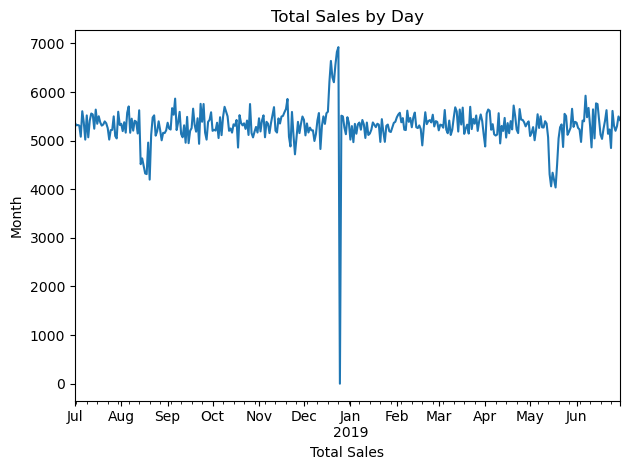

In [47]:
daily_sales.plot(kind='line')
plt.title("Total Sales by Day")
plt.xlabel("Total Sales")
plt.ylabel("Month")
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

There seems to be a day in late december that had no sales, it was likely due to a holiday where the store was closed.

Examining the Customer Dataset

In [49]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
duplicates = customer_df.duplicated()
print(duplicates == True)

0        False
1        False
2        False
3        False
4        False
         ...  
72632    False
72633    False
72634    False
72635    False
72636    False
Length: 72637, dtype: bool
